In [1]:
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to extract and clean text from a PDF file
def extract_clean_text_from_pdf(pdf_path):
    lemmatizer = WordNetLemmatizer()

    text = ""
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text() + " "

    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words and not token.isnumeric()]

    cleaned_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

# List of PDF file paths (replace with your own file paths)
pdf_paths = [
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aDRIAN ET AL. 2016. Towards Developing Strategic Assessment Model for Big Data Implementation.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aL SAI ET AL. 2020. Critical Success Factors for Big Data; AS SYS LIT REVIEW.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Al sai et al.2023. Big Data Maturity Assessment Models.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Bahim et al. 2020. The FAIR Data Maturity Model.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\comuzzi et al. 2023. How organisations leverage Big Data.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\cORALLO ET AL. 2023. Evaluating maturity level of big data management and analytics in industrial companies.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\EL-DARWICHE etll 2014.Big Data Maturity; An Action Plan for Policymakers and Executives.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Farah.2017. A Value Based Big Data Maturity Model.pdf.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Gökalp,M.O., 2021 et al.Assessment of processcapabilitiesin transitionto a data driven organisationa multidisciplinary approach.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Halper, F. 2020. TDWI Analytics Maturity Model.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\hELMY ET AL.2022.Analytical Study on Building a Comprehensive Big Data Management.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Cheng, 2018. Business analytics maturity of firms.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\kADARSAH ET AL. 2023. The_Role_of_Knowledge Oriented_Leadership_in_Fostering_Innovation_Capabilities_The_Mediating_Role_of_Data_Analytics_Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\kORSTEN ET AL. 2021. ADA CMM; A Capability Maturity Model for Advanced Data Analytics.pdf.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Limpeeticharoenchot ET AL. (2020). Innovative Mobile Application for Measuring Big Data Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MACKE ET AL. 2017  2023. Measuring your big data maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MACKE ET AL. 2017- 2023. Measuring your big data maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Malacaria et al. 2023. An Application of the Analytic Hierarchy Process to the Evaluation of Companies Data Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Marti Rossello 2023. Seeing the data for the trees Assessing the data maturity and readiness of a UK.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MENUKIN ET AL. 2023. Guiding the integration of analytics in business operations through a maturity framework.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Mohd et al. 2017. Big data maturity model a preliminary evaluation.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOHIB ET AL. 2023. How Can SMEs Benefit from Big Data; Challenges and a Path Forward.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOTJOLOPANE ET AL. 2023.Digital transformation dimensions for evaluating SMEs  readiness for big data analytics and artificial intelligence.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\mOUHIB.2023.Analyzing the Global Big Data Maturity Model Domains for Better Adoption of Big Data Projects.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\nDA ET AL. 2020. Assessment of big data analytics maturity models; an overview.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\OKUYUCU ET AL.2020.Big data maturity models for the public sector.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PARRA ET AL. 2019. A Maturity Model for the Information Driven SME.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PARRA ET AL. 2019. A Maturity Model for the Information-Driven SME.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PENA ET AL. 2019. A fuzzy ELECTRE structure methodology to assess big data maturity in healthcare SMEs.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RAJTERIC . 2010. OVERVIEW OF BUSINESS INTELLIGENCE MATURITY MODELS.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RETRIALISCA ET AL. 2020.The Maturity Measurement of Big Data Adoption in MC using TDWI MM.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RUNION ET AL. 2016. A study of the perceptions held by information technology professionals in relation to the maturity.pdf"
]

# Extract and clean text from each document
cleaned_documents = []
for pdf_path in pdf_paths:
    cleaned_text = extract_clean_text_from_pdf(pdf_path)
    cleaned_documents.append(cleaned_text)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_documents)

# Get feature names (terms) from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame for visualization
df_tdm = pd.DataFrame(X_tfidf.toarray(), columns=terms)

# Display the Term Document Matrix (TDM) with TF-IDF weights
print(df_tdm)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     0085the  01047760201723012291r       01d       01m       02d    02june  \
0   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000               0.000000  0.056473  0.112946  0.040338  0.000000   
4   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000               0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000               0.000000  0.000000  0.000

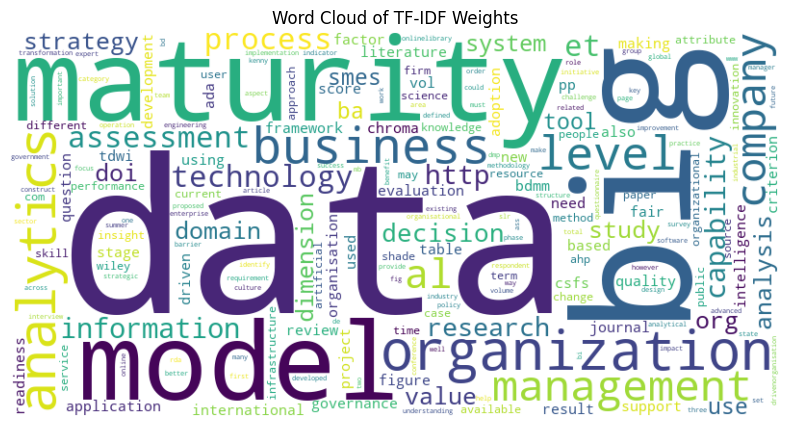

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Calculate sum of TF-IDF weights for each term across all documents
term_frequencies = np.sum(X_tfidf, axis=0)

# Get terms (feature names) from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary mapping terms to their corresponding frequencies
term_freq_dict = {term: term_frequencies[0, idx] for idx, term in enumerate(terms)}

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq_dict)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Weights')
plt.show()


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the lemmatized tokens back into a single string
text_for_wordcloud = ' '.join(cleaned_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_for_wordcloud)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


NameError: name 'cleaned_tokens' is not defined

### Extract and Clean Text from Multiple PDF Documents
We'll modify the existing code to extract and clean text from multiple PDF documents:

### Analyze Word Relations, Word Frequencies, and Collocations
We'll analyze word frequencies and identify collocations (word relations) using NLTK:

### Categorize and Identify Main/Subtopics
To categorize and identify main/subtopics, you can use techniques such as clustering or topic modeling (e.g., LDA - Latent Dirichlet Allocation) depending on the complexity of the task and the amount of data:

In [10]:
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import numpy as np
import pandas as pd
from scipy.stats import binomtest
import scipy.sparse as sp

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to extract and clean text from a PDF file
def extract_clean_text_from_pdf(pdf_path):
    lemmatizer = WordNetLemmatizer()
    text = ""
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            page_text = page.extract_text()
            if page_text:  # Check if text extraction returned text
                text += page_text + " "

    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\b\d+\b', '', text)   # Remove standalone digits

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    cleaned_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens if token.isalpha()]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

# Example PDF paths
pdf_paths = [
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aDRIAN ET AL. 2016. Towards Developing Strategic Assessment Model for Big Data Implementation.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aL SAI ET AL. 2020. Critical Success Factors for Big Data; AS SYS LIT REVIEW.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Al sai et al.2023. Big Data Maturity Assessment Models.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Bahim et al. 2020. The FAIR Data Maturity Model.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\comuzzi et al. 2023. How organisations leverage Big Data.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\cORALLO ET AL. 2023. Evaluating maturity level of big data management and analytics in industrial companies.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\EL-DARWICHE etll 2014.Big Data Maturity; An Action Plan for Policymakers and Executives.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Farah.2017. A Value Based Big Data Maturity Model.pdf.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Gökalp,M.O., 2021 et al.Assessment of processcapabilitiesin transitionto a data driven organisationa multidisciplinary approach.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Halper, F. 2020. TDWI Analytics Maturity Model.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\hELMY ET AL.2022.Analytical Study on Building a Comprehensive Big Data Management.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Cheng, 2018. Business analytics maturity of firms.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\kADARSAH ET AL. 2023. The_Role_of_Knowledge Oriented_Leadership_in_Fostering_Innovation_Capabilities_The_Mediating_Role_of_Data_Analytics_Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\kORSTEN ET AL. 2021. ADA CMM; A Capability Maturity Model for Advanced Data Analytics.pdf.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Limpeeticharoenchot ET AL. (2020). Innovative Mobile Application for Measuring Big Data Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MACKE ET AL. 2017  2023. Measuring your big data maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MACKE ET AL. 2017- 2023. Measuring your big data maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Malacaria et al. 2023. An Application of the Analytic Hierarchy Process to the Evaluation of Companies Data Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Marti Rossello 2023. Seeing the data for the trees Assessing the data maturity and readiness of a UK.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MENUKIN ET AL. 2023. Guiding the integration of analytics in business operations through a maturity framework.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Mohd et al. 2017. Big data maturity model a preliminary evaluation.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOHIB ET AL. 2023. How Can SMEs Benefit from Big Data; Challenges and a Path Forward.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOTJOLOPANE ET AL. 2023.Digital transformation dimensions for evaluating SMEs  readiness for big data analytics and artificial intelligence.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\mOUHIB.2023.Analyzing the Global Big Data Maturity Model Domains for Better Adoption of Big Data Projects.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\nDA ET AL. 2020. Assessment of big data analytics maturity models; an overview.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\OKUYUCU ET AL.2020.Big data maturity models for the public sector.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PARRA ET AL. 2019. A Maturity Model for the Information Driven SME.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PARRA ET AL. 2019. A Maturity Model for the Information-Driven SME.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PENA ET AL. 2019. A fuzzy ELECTRE structure methodology to assess big data maturity in healthcare SMEs.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RAJTERIC . 2010. OVERVIEW OF BUSINESS INTELLIGENCE MATURITY MODELS.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RETRIALISCA ET AL. 2020.The Maturity Measurement of Big Data Adoption in MC using TDWI MM.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RUNION ET AL. 2016. A study of the perceptions held by information technology professionals in relation to the maturity.pdf"
]

# Extract and clean text from each document
cleaned_documents = [extract_clean_text_from_pdf(pdf) for pdf in pdf_paths]

# Combine all texts into a single corpus for analysis
corpus = ' '.join(cleaned_documents)
tokens = word_tokenize(corpus)
terms = set(tokens)  # Assume all tokens are potential terms for TDM

# Binary term-document matrix creation and formatting as DataFrame
def create_binary_tdm(docs, terms):
    terms = list(terms)
    doc_labels = [f"Document {i+1}" for i in range(len(docs))]  # Naming documents for clarity
    tdm = np.zeros((len(terms), len(docs)), dtype=int)
    for j, doc in enumerate(docs):
        doc_tokens = set(word_tokenize(doc))
        for i, term in enumerate(terms):
            tdm[i, j] = 1 if term in doc_tokens else 0

    # Convert the matrix to a DataFrame for better readability
    return pd.DataFrame(tdm, index=terms, columns=doc_labels)

binary_tdm_df = create_binary_tdm(cleaned_documents, terms)

# Calculate mean and standard deviation for each term's document frequency
mean_freq = np.mean(binary_tdm_df, axis=1)
std_dev_freq = np.std(binary_tdm_df, axis=1)

# Analyze word frequencies and collocations on cleaned text
word_freq = nltk.FreqDist(tokens)
collocations = nltk.collocations.BigramCollocationFinder.from_words(tokens).nbest(nltk.collocations.BigramAssocMeasures().pmi, 10)

# Output results for review
print("Most common words:")
print(word_freq.most_common(20))
print("\nCollocations:")
print(collocations)
print("\nBinary Term-Document Matrix:")
print(binary_tdm_df)
print("\nMean Frequencies:")
print(mean_freq)
print("\nStandard Deviations:")
print(std_dev_freq)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common words:
[('data', 7171), ('big', 3528), ('maturity', 3183), ('model', 2737), ('analytics', 1867), ('organization', 1520), ('business', 1477), ('level', 1416), ('management', 1253), ('assessment', 980), ('company', 972), ('technology', 951), ('process', 939), ('capability', 934), ('information', 851), ('research', 770), ('decision', 656), ('http', 656), ('study', 640), ('value', 614)]

Collocations:
[('aaba', 'kdds'), ('abdo', 'khasawneh'), ('abi', 'lity'), ('acce', 'ptance'), ('accel', 'erated'), ('acceptablerisklevel', 'thisprocessevaluateswhetherfinancial'), ('acceptedstructuresuchas', 'cmmioriso'), ('acco', 'unt'), ('accordingtotheassessmentresults', 'successfultransitiontobecomingadata'), ('accordingtothefindings', 'ofthemultiple')]

Binary Term-Document Matrix:
                       Document 1  Document 2  Document 3  Document 4  \
segmentation                    0           0           0           0   
diversified                     0           0           0         

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common words:
[('data', 7010), ('big', 3494), ('maturity', 3163), ('model', 2727), ('analytics', 1841), ('organization', 1454), ('business', 1443), ('level', 1402), ('management', 1231), ('assessment', 971), ('company', 955), ('technology', 916), ('capability', 915), ('process', 914), ('information', 839), ('research', 770), ('http', 656), ('decision', 647), ('study', 640), ('value', 611)]

Collocations:
[('aaba', 'kdds'), ('abdo', 'khasawneh'), ('abi', 'lity'), ('acce', 'ptance'), ('accel', 'erated'), ('acceptablerisklevel', 'thisprocessevaluateswhetherfinancial'), ('acceptedstructuresuchas', 'cmmioriso'), ('acco', 'unt'), ('accordingtotheassessmentresults', 'successfultransitiontobecomingadata'), ('accordingtothefindings', 'ofthemultiple')]

Binary Term-Document Matrix:
                         Document 1  Document 2  Document 3  Document 4  \
cmmi                              0           0           1           0   
andperiodicallyreviewed           0           0           0   

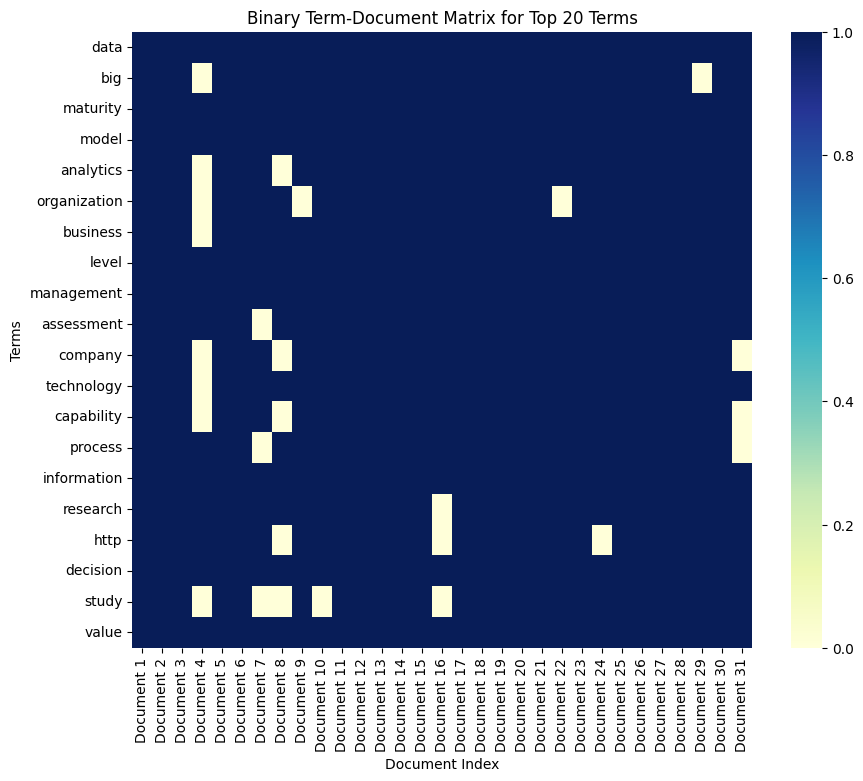

In [5]:
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest
import scipy.sparse as sp

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to extract and clean text from a PDF file
def extract_clean_text_from_pdf(pdf_path):
    lemmatizer = WordNetLemmatizer()
    text = ""
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            page_text = page.extract_text()
            if page_text:  # Check if text extraction returned text
                text += page_text + " "

    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\b\d+\b', '', text)   # Remove standalone digits

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    cleaned_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens if token.isalpha()]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

# Example PDF paths
pdf_paths = [
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aDRIAN ET AL. 2016. Towards Developing Strategic Assessment Model for Big Data Implementation.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\aL SAI ET AL. 2020. Critical Success Factors for Big Data; AS SYS LIT REVIEW.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Al sai et al.2023. Big Data Maturity Assessment Models.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Bahim et al. 2020. The FAIR Data Maturity Model.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\comuzzi et al. 2023. How organisations leverage Big Data.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\cORALLO ET AL. 2023. Evaluating maturity level of big data management and analytics in industrial companies.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\EL-DARWICHE etll 2014.Big Data Maturity; An Action Plan for Policymakers and Executives.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Farah.2017. A Value Based Big Data Maturity Model.pdf.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Gökalp,M.O., 2021 et al.Assessment of processcapabilitiesin transitionto a data driven organisationa multidisciplinary approach.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Halper, F. 2020. TDWI Analytics Maturity Model.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\hELMY ET AL.2022.Analytical Study on Building a Comprehensive Big Data Management.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Cheng, 2018. Business analytics maturity of firms.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\kADARSAH ET AL. 2023. The_Role_of_Knowledge Oriented_Leadership_in_Fostering_Innovation_Capabilities_The_Mediating_Role_of_Data_Analytics_Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\kORSTEN ET AL. 2021. ADA CMM; A Capability Maturity Model for Advanced Data Analytics.pdf.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Limpeeticharoenchot ET AL. (2020). Innovative Mobile Application for Measuring Big Data Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MACKE ET AL. 2017  2023. Measuring your big data maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Malacaria et al. 2023. An Application of the Analytic Hierarchy Process to the Evaluation of Companies Data Maturity.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Marti Rossello 2023. Seeing the data for the trees Assessing the data maturity and readiness of a UK.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MENUKIN ET AL. 2023. Guiding the integration of analytics in business operations through a maturity framework.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\Mohd et al. 2017. Big data maturity model a preliminary evaluation.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOHIB ET AL. 2023. How Can SMEs Benefit from Big Data; Challenges and a Path Forward.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\MOTJOLOPANE ET AL. 2023.Digital transformation dimensions for evaluating SMEs  readiness for big data analytics and artificial intelligence.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\mOUHIB.2023.Analyzing the Global Big Data Maturity Model Domains for Better Adoption of Big Data Projects.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\nDA ET AL. 2020. Assessment of big data analytics maturity models; an overview.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\OKUYUCU ET AL.2020.Big data maturity models for the public sector.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PARRA ET AL. 2019. A Maturity Model for the Information Driven SME.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PARRA ET AL. 2019. A Maturity Model for the Information-Driven SME.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\PENA ET AL. 2019. A fuzzy ELECTRE structure methodology to assess big data maturity in healthcare SMEs.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RAJTERIC . 2010. OVERVIEW OF BUSINESS INTELLIGENCE MATURITY MODELS.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RETRIALISCA ET AL. 2020.The Maturity Measurement of Big Data Adoption in MC using TDWI MM.pdf",
    r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\01big project M3DMiB - text mining\articles\RUNION ET AL. 2016. A study of the perceptions held by information technology professionals in relation to the maturity.pdf"
]

# Extract and clean text from each document
cleaned_documents = [extract_clean_text_from_pdf(pdf) for pdf in pdf_paths]

# Combine all texts into a single corpus for analysis
corpus = ' '.join(cleaned_documents)
tokens = word_tokenize(corpus)
terms = set(tokens)  # Assume all tokens are potential terms for TDM

# Binary term-document matrix creation and formatting as DataFrame
def create_binary_tdm(docs, terms):
    terms = list(terms)
    doc_labels = [f"Document {i+1}" for i in range(len(docs))]  # Naming documents for clarity
    tdm = np.zeros((len(terms), len(docs)), dtype=int)
    for j, doc in enumerate(docs):
        doc_tokens = set(word_tokenize(doc))
        for i, term in enumerate(terms):
            tdm[i, j] = 1 if term in doc_tokens else 0

    # Convert the matrix to a DataFrame for better readability
    return pd.DataFrame(tdm, index=terms, columns=doc_labels)

binary_tdm_df = create_binary_tdm(cleaned_documents, terms)

# Calculate mean and standard deviation for each term's document frequency
mean_freq = np.mean(binary_tdm_df, axis=1)
std_dev_freq = np.std(binary_tdm_df, axis=1)

# Analyze word frequencies and collocations on cleaned text
word_freq = nltk.FreqDist(tokens)
collocations = nltk.collocations.BigramCollocationFinder.from_words(tokens).nbest(nltk.collocations.BigramAssocMeasures().pmi, 10)

# Output results for review
print("Most common words:")
print(word_freq.most_common(20))
print("\nCollocations:")
print(collocations)
print("\nBinary Term-Document Matrix:")
print(binary_tdm_df)
print("\nMean Frequencies:")
print(mean_freq)
print("\nStandard Deviations:")
print(std_dev_freq)

# Plotting the heatmap of the binary term-document matrix for top 20 terms
top_terms = [term for term, freq in word_freq.most_common(20)]
filtered_tdm = binary_tdm_df.loc[top_terms]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_tdm, cmap="YlGnBu", yticklabels=True, xticklabels=True)
plt.title('Binary Term-Document Matrix for Top 20 Terms')
plt.xlabel('Document Index')
plt.ylabel('Terms')
plt.show()
